![](../docs/banner.png)

# Chapter 1: Introduction to Spatial Data

**Tomas Beuzen, 2021**

![](img/map.png)

## Chapter Outline
<hr>

<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-Learning-Objectives" data-toc-modified-id="Chapter-Learning-Objectives-2">Chapter Learning Objectives</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3">Imports</a></span></li><li><span><a href="#1.-Introduction-to-spatial-data" data-toc-modified-id="1.-Introduction-to-spatial-data-4">1. Introduction to spatial data</a></span></li><li><span><a href="#2.-Working-with-vector-data" data-toc-modified-id="2.-Working-with-vector-data-5">2. Working with vector data</a></span></li><li><span><a href="#3.-Working-with-raster-data" data-toc-modified-id="3.-Working-with-raster-data-6">3. Working with raster data</a></span></li><li><span><a href="#4.-Coordinate-reference-systems" data-toc-modified-id="4.-Coordinate-reference-systems-7">4. Coordinate reference systems</a></span></li></ul></div>

## Chapter Learning Objectives
<hr>

- Describe the difference between vector and raster data.
- Load vector data into `geopandas`.
- Plot vector data using the `geopandas` method `.plot()`.
- Wrangle vector data using `geopandas` functions, methods, and attributes like `gpd.sjoin()`, `gpd.clip()`, `.length()`, `.buffer()`, etc.
- Import data from OpenStreetMap using `osmnx`.
- Read raster data with `rasterio`.
- Describe at a high level why coordinate reference systems (CRS) are important and identify the CRS of a `geopandas` object using the `.crs` attribute and reproject it to another CRS using the `.to_crs()` method.

## Imports
<hr>

In [1]:
import rasterio
import numpy as np
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (6, 6), 'axes.edgecolor': '0.2'})

## 1. Introduction to spatial data
<hr>

Spatial data (or "geospatial" data) are data with location information. In this short course, we'll learn to wrangle, plot, and model this kind of data to describe and understand its spatial information and dependence. 


The first thing we need to know is that there are two main data formats used to represent spatial data:
1. Vector format
2. Raster format

## 2. Working with vector data
<hr>

### 2.1. Vector data

Vector data is an intuitive and common spatial data format and the one we'll focus on most in this chapter. Vector data is simply a collection of discrete locations (`(x, y)` values) called "vertices" that define one of three shapes:
1. **Point**: a single `(x, y)` point. Like the location of your house.
2. **Line**: two or more connected `(x, y)` points. Like a road.
3. **Polygon**: three or more `(x, y)` points connected and closed. Like a lake, or the border of a country.

![](img/vector.png)

>Source: [National Ecological Observatory Network](https://github.com/NEONScience/NEON-Data-Skills).

Vector data is most commonly stored in a "shapefile". A shapefile is actually composed of 3 required files with the same prefix (here, `spatial-data`) but different extensions:
1. `spatial-data.shp`: main file that stores records of each shape geometries
2. `spatial-data.shx`: index of how the geometries in the main file relate to one-another
3. `spatial-data.dbf`: attributes of each record

There are [other optional files](https://desktop.arcgis.com/en/arcmap/10.3/manage-data/shapefiles/shapefile-file-extensions.htm) that may also be part of a shapefile but we won't worry about them for now. Each shapefile can only contain one type of shape. For example, the descriptions for a house (point), a road (line), and a postal code area (polygon) would be stored in three separate shapefiles.

>There are other file-types for storing vector data too like `geojson`. These files can generally be imported into Python using the same methods and packages we use below.

### 2.2. Geopandas

The Python [geopandas](https://geopandas.org/getting_started/introduction.html) library is the main library we'll be using to work with vector data in Python. It's built off `shapely` (which is *the* Python library for working with geometric objects in Python) and `pandas`. Similar to `pandas`, `geopandas` provides two key classes for spatial data manipulation:
1. `GeoSeries`: just like a `pandas` series but stores geometries like points, lines, polygons (we'll see that shortly)
2. `GeoDataFrame`: just like a `pandas` dataframe with one or more columns of regular series and one or more columns of `geoseries`.

Along with those classes, we also have a variety of cool geopstial wrangling methods which we'll explore in this chapter. For now, here's a schematic of a `GeoDataFrame`:

![](img/geopandas.png)

>Source: [GeoPandas Documentation](https://geopandas.org/getting_started/introduction.html).

We usually import `geopandas` using the alias `gpd`:

In [2]:
import geopandas as gpd

### 2.3. Loading data

Let's take a look at loading in a shapefile to a `GeoDataFrame` now. I downloaded a shapefile of the 16 Polish fisrt-level administrative divisions from [The University of Texas Libraries](https://stacks.stanford.edu/file/druid:jv191xm2015/data.zip) as a shapefile that looks like this:

```
poland-admin-divisions
├── POL_admn1.dbf
├── POL_adm1.shp
├── POL_adm1.shx
└── POL_adm1.prj  # this contains projection information which I'll dicuss later
```

We can read that shapefile using `gpd.read_file()`:

In [3]:
poland_admin_divisions = gpd.read_file("data-spatial/poland-admin-divisions")  # note that I point to the shapefile "directory" containg all the individual files
# poland_admin_divisions = poland_admin_divisions.to_crs("EPSG:2180")    # I'll explain this later, I'm converting to a different coordinate reference system
poland_admin_divisions

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,181,POL,Poland,1,ÅÃ³dÅº,PL.LD,0,None,WojewÃ³dztwo,Voivodeship|Province,None,LÃ³dzkie,"POLYGON ((19.34231 52.30919, 19.36254 52.29567..."
1,181,POL,Poland,2,ÅwiÄtokrzyskie,PL.SK,0,None,WojewÃ³dztwo,Voivodeship|Province,None,Swietokrzyskie,"POLYGON ((20.70706 51.14639, 20.71060 51.14365..."
2,181,POL,Poland,3,Greater Poland,PL.WP,0,None,WojewÃ³dztwo,Voivodeship|Province,None,Wielkopolskie,"POLYGON ((16.92182 53.59652, 16.94773 53.58820..."
3,181,POL,Poland,4,Kuyavian-Pomeranian,PL.KP,0,None,WojewÃ³dztwo,Voivodeship|Province,None,Kujawsko-Pomorskie,"POLYGON ((18.25566 53.69423, 18.27436 53.67850..."
4,181,POL,Poland,5,Lesser Poland,PL.MA,0,None,WojewÃ³dztwo,Voivodeship|Province,None,Malopolskie,"POLYGON ((20.15906 50.43463, 20.17673 50.43217..."
5,181,POL,Poland,6,Lower Silesian,PL.DS,0,None,WojewÃ³dztwo,Voivodeship|Province,None,Dolnoslaskie,"POLYGON ((16.16883 51.66089, 16.19236 51.65255..."
6,181,POL,Poland,7,Lublin,PL.LU,0,None,WojewÃ³dztwo,Voivodeship|Province,None,Lubelskie,"POLYGON ((23.19990 52.29715, 23.19235 52.28583..."
7,181,POL,Poland,8,Lubusz,PL.LB,0,None,WojewÃ³dztwo,Voivodeship|Province,None,Lubuskie,"POLYGON ((16.02720 53.10739, 16.03948 53.09146..."
8,181,POL,Poland,9,Masovian,PL.MZ,0,None,WojewÃ³dztwo,Voivodeship|Province,None,Mazowieckie,"POLYGON ((21.56137 53.37360, 21.56842 53.35785..."
9,181,POL,Poland,10,Opole,PL.OP,0,None,WojewÃ³dztwo,Voivodeship|Province,None,Opolskie,"POLYGON ((17.79365 51.13264, 17.79803 51.12693..."


In [4]:
type(poland_admin_divisions)

geopandas.geodataframe.GeoDataFrame

Because `geopandas` is built off `pandas`, our `GeoDataFrame` inherits most of the same functionality as a regular dataframe. For example, let's try the `.info()` method:

In [5]:
poland_admin_divisions.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID_0       16 non-null     int64   
 1   ISO        16 non-null     object  
 2   NAME_0     16 non-null     object  
 3   ID_1       16 non-null     int64   
 4   NAME_1     16 non-null     object  
 5   HASC_1     16 non-null     object  
 6   CCN_1      16 non-null     int64   
 7   CCA_1      0 non-null      object  
 8   TYPE_1     16 non-null     object  
 9   ENGTYPE_1  16 non-null     object  
 10  NL_NAME_1  0 non-null      object  
 11  VARNAME_1  16 non-null     object  
 12  geometry   16 non-null     geometry
dtypes: geometry(1), int64(3), object(9)
memory usage: 1.8+ KB


Note we have 9 columns of dtype "object" which typically means "strings" in `pandas`, and we have our one "geometry" column which contains vector data - polygons in this case. 

`geopandas` has built-in plotting functionality (just like `pandas`) which is useful for making quick plots to visualize your data:

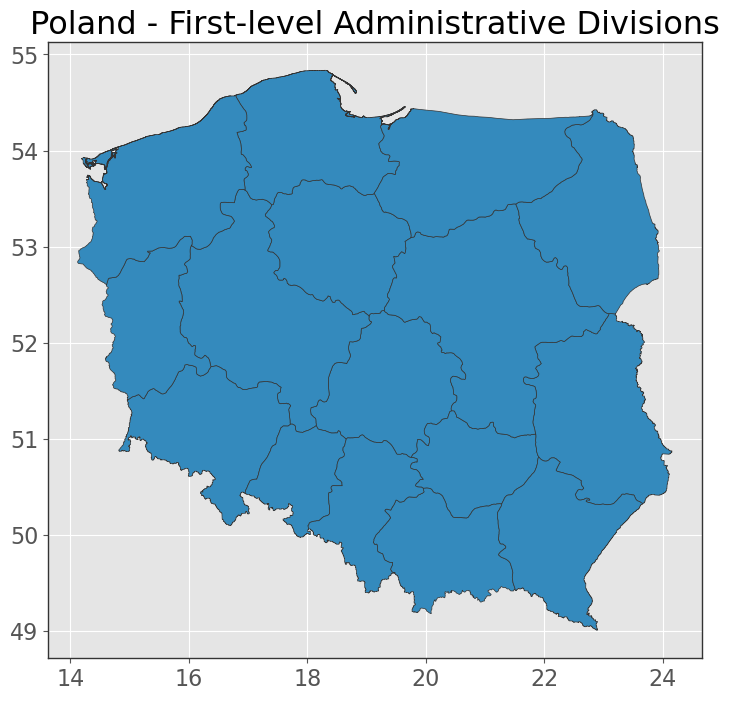

In [5]:
poland_admin_divisions.plot(edgecolor="0.2", figsize=(10, 8))
plt.title("Poland - First-level Administrative Divisions");

That looks like Poland to me! We can also index our `GeoDataFrame` just like a regular dataframe:

In [6]:
poland_admin_divisions.iloc[[0]]

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,181,POL,Poland,1,ÅÃ³dÅº,PL.LD,0,None,WojewÃ³dztwo,Voivodeship|Province,None,LÃ³dzkie,"POLYGON ((19.34231 52.30919, 19.36254 52.29567..."


/home/stephen137/mambaforge/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/home/stephen137/mambaforge/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


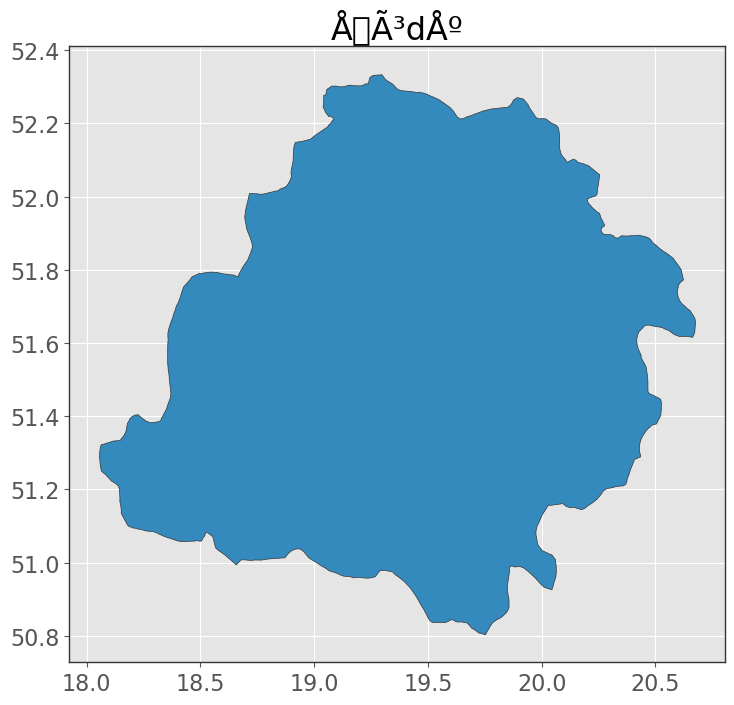

In [7]:
name = poland_admin_divisions.iloc[0]["NAME_1"]
poland_admin_divisions.iloc[[0]].plot(edgecolor="0.2", figsize=(10, 8))
plt.title(name);

Let's filter our dataframe for the district where I live, `Lesser Poland`  using the helpful `pandas` method `.query()`:

In [8]:
admin_division = "Lesser Poland"
lp = poland_admin_divisions.query("NAME_1 == @admin_division").copy()
lp

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
4,181,POL,Poland,5,Lesser Poland,PL.MA,0,None,WojewÃ³dztwo,Voivodeship|Province,None,Malopolskie,"POLYGON ((20.15906 50.43463, 20.17673 50.43217..."


Now, let's do some simple manipulation to clean up our dataframe:

In [9]:
lp = (lp.loc[:, ["NAME_1", "geometry"]]
        .rename(columns={"NAME_1": "First-level admin division"})
        .reset_index(drop=True)
      )
lp

,First-level admin division,geometry
0,Lesser Poland,"POLYGON ((20.15906 50.43463, 20.17673 50.43217..."


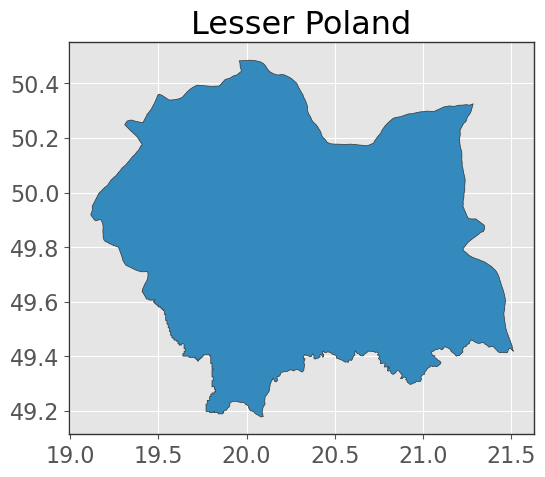

In [10]:
lp.plot(edgecolor="0.2")
plt.title("Lesser Poland");

### 2.3. Making data

Typically, you'll be loading data from a file like we did above (or using an API as we'll do later in this chapter). But we can also create our own vector data. Let's create some "points" for Lesser Poland's biggest cities in a regular dataframe:

In [11]:
cities = pd.DataFrame(
    {"City": ["Kraków", "Nowy Sącz", "Tarnów"],
     "Population": [766_683, 80_756, 107_045],
     "Latitude": [50.049683, 49.6175, 50.0121],
     "Longitude": [19.9450, 20.7153, 20.9858],
    }
)
cities

,City,Population,Latitude,Longitude
0,Kraków,766683,50.049683,19.9450
1,Nowy Sącz,80756,49.617500,20.7153
2,Tarnów,107045,50.012100,20.9858


We can coerce that data into a `GeoDataFrame` using `gpd.GeoDataFrame()` and by using the function `gpd.points_from_xy()` to change our "Latitude" and "Longitude" columns to geometries:

In [12]:
cities = gpd.GeoDataFrame(cities,
                          crs="EPSG:4326",  # I'll talk about this later
                          geometry=gpd.points_from_xy(cities["Longitude"], cities["Latitude"]))
cities

,City,Population,Latitude,Longitude,geometry
0,Kraków,766683,50.049683,19.9450,POINT (19.94500 50.04968)
1,Nowy Sącz,80756,49.617500,20.7153,POINT (20.71530 49.61750)
2,Tarnów,107045,50.012100,20.9858,POINT (20.98580 50.01210)


Let's plot those points on our map:

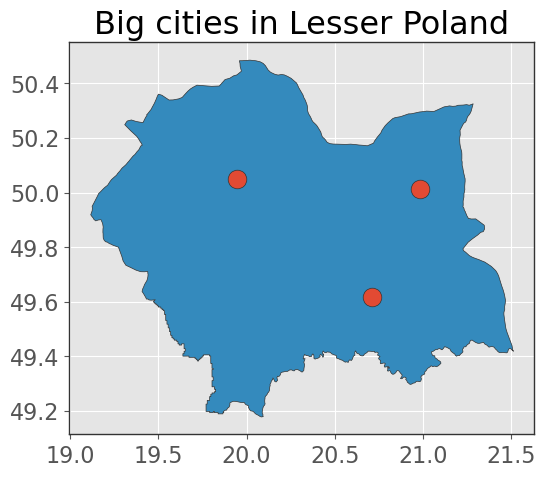

In [13]:
ax = lp.plot(edgecolor="0.2")
cities.plot(ax=ax, markersize=180, edgecolor="0.2")
plt.title("Big cities in Lesser Poland");

### 2.4. Loading from Open Street Map

So we can read vector data from a file and we can create our own, but let's see what real power feels like!

![](img/real-power.gif)

Often it will be helpful to obtain data from an online source using an API. The most relevant "online source" here is [OpenStreetMap (OSM)](https://www.openstreetmap.org/), which is like the Wikipedia of geospatial data (think world map, road networks, bike networks, buidling heights, sandy coastlines, you name it). There are plenty of Python APIs for getting data from OSM but by far the best I've come across is [osmnx](https://github.com/gboeing/osmnx/tree/master):

```console
conda install -c conda-forge osmnx
```

`osmnx` provides an easy-to-use API to query OSM data. I usually import it with the alias `ox`. Let's get a polygon of Kraków now using the function `ox.geocode_to_gdf()`:

>By default `osmnx` caches responses locally in a folder `cache` so that you can quickly access data again without needing to call the API. You can turn this behaviour off if you wish.

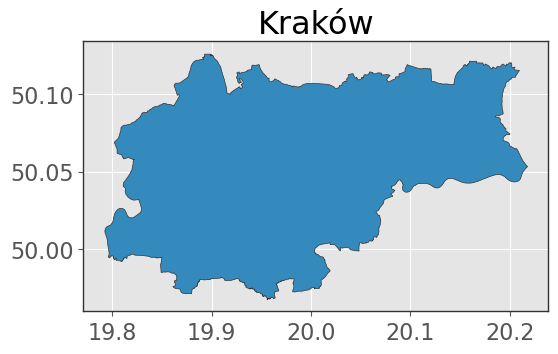

In [14]:
import osmnx as ox

krakow= ox.geocode_to_gdf("Kraków, Poland")
krakow.plot(edgecolor="0.2")
plt.title("Kraków");

It's certainly Kraków, but it might be a bit low resolution, or someone just decided this was the best way to encapsulate "Kraków" on OSM. Either way, let's use this polygon to "clip" a section of our hadministrative divisions data which we downloaded earlier. 

This is the first geometric wrangling operation we'll see. I'll show some more later, but think of "clipping" as passing a top layer of cookie dough (the map above), over a bottom layer cookiecutter (our high-resolution provinces data) to get a shape out:

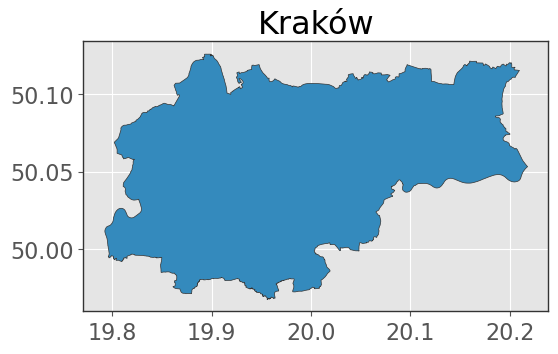

In [15]:
krakow_lp = gpd.clip(lp, krakow)
krakow_lp.plot(edgecolor="0.2")
plt.title("Kraków");

That looks identical! So, the OSM resolution was clearly of a high quality. Let's get a polygon of one of my favourite places in Kraków, Wolski Forest :

In [16]:
wolski_forest = ox.geocode_to_gdf("Wolski Forest, Kraków")

And plot it on our map:

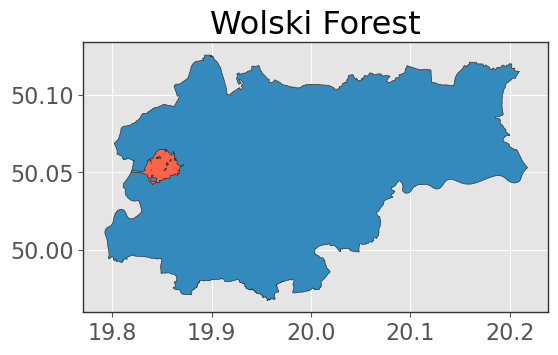

In [17]:
ax = krakow_lp.plot(edgecolor="0.2")
wolski_forest.plot(ax=ax, edgecolor="0.2", color="tomato")
plt.title("Wolski Forest");

Okay let's do one last cool thing! Let's use `osmnx` to get the bicycle network within Wolski Forest! We can get networks like road, rail, bike, etc., using the function `ox.graph_from_place()`:

In [18]:
bike_network = ox.graph_from_place("Wolski Forest, Kraków",
                                   network_type="bike")
bike_network

As you can see, this returns a different object, a [networkx](https://networkx.org/) `MultiDiGraph` which is a structure for holding network/graph-like objects such as road networks. We're not interested in graph operations, we are just interested in geometries, so we'll convert this to a `GeoDataFrame` using the function `ox.graph_to_gdfs()`:

In [19]:
bike_network = (ox.graph_to_gdfs(bike_network, nodes=False)
                  .reset_index(drop=True)
                  .loc[:, ["name", "length", "geometry"]]
               )
bike_network

,name,length,geometry
0,NaN,27.655,"LINESTRING (19.86202 50.05884, 19.86165 50.05891)"
1,NaN,0.973,"LINESTRING (19.86202 50.05884, 19.86203 50.05883)"
2,NaN,33.101,"LINESTRING (19.86202 50.05884, 19.86181 50.058..."
3,NaN,10.750,"LINESTRING (19.85805 50.05916, 19.85803 50.05907)"
4,NaN,117.395,"LINESTRING (19.85805 50.05916, 19.85805 50.059..."
...,...,...,...
803,NaN,28.535,"LINESTRING (19.84968 50.06005, 19.84951 50.06028)"
804,NaN,71.935,"LINESTRING (19.84898 50.06081, 19.84922 50.060..."
805,NaN,36.276,"LINESTRING (19.85078 50.06175, 19.85049 50.061..."
806,NaN,41.869,"LINESTRING (19.84975 50.06160, 19.84986 50.061..."


Now let's plot this bike network on Wolski Forest!

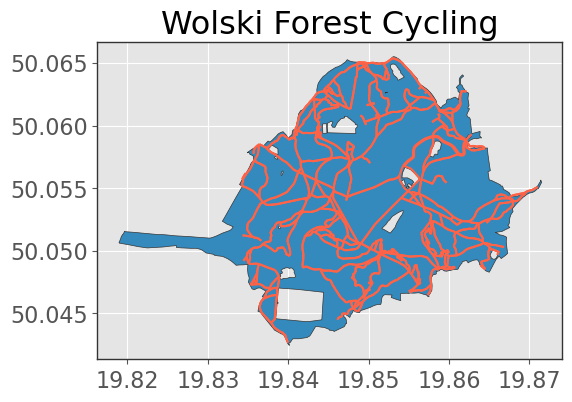

In [20]:
ax = wolski_forest.plot(edgecolor="0.2")
bike_network.plot(ax=ax, edgecolor="0.2", color="tomato")
plt.title("Wolski Forest Cycling");

Amazing stuff!

### 2.5. Basic wrangling

So we did some cool mapping and data manipulation above, but what's it all for? Why would you want to do any of this? Well we can now start calculating and manipulating this spatial data to answer questions. Let's answer some now.

#### Question 1: What is the total length of bike lanes in Wolski Forest?

Well, our `GeoDataFrame` actually already has this information, it came for free from our original `ox.graph_from_place()` function and is in the "length" column:

In [21]:
total_length = bike_network["length"].sum()  # total length in m
print(f"Total bike lane length: {total_length / 1000:.0f}km")

Total bike lane length: 93km


But even if we didn't have this column, we could still calculate lengths based on our line geometries and the `.length` attribute:

In [22]:
bike_network["geometry"]

0      LINESTRING (19.86202 50.05884, 19.86165 50.05891)
1      LINESTRING (19.86202 50.05884, 19.86203 50.05883)
2      LINESTRING (19.86202 50.05884, 19.86181 50.058...
3      LINESTRING (19.85805 50.05916, 19.85803 50.05907)
4      LINESTRING (19.85805 50.05916, 19.85805 50.059...
                             ...                        
803    LINESTRING (19.84968 50.06005, 19.84951 50.06028)
804    LINESTRING (19.84898 50.06081, 19.84922 50.060...
805    LINESTRING (19.85078 50.06175, 19.85049 50.061...
806    LINESTRING (19.84975 50.06160, 19.84986 50.061...
807    LINESTRING (19.86465 50.05222, 19.86522 50.05258)
Name: geometry, Length: 808, dtype: geometry

In [23]:
bike_network["geometry"].length

/tmp/ipykernel_219/1037680648.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bike_network["geometry"].length


0      0.000377
1      0.000012
2      0.000398
3      0.000099
4      0.001341
         ...   
803    0.000289
804    0.000774
805    0.000492
806    0.000566
807    0.000675
Length: 808, dtype: float64

What's that warning? More on that a bit later, but it's telling us that our coordinate system has units of degrees - not linear units like meters which would be better for calculating distances. I'm going to convert my geometries to a coordinate systems based on linear units (meters). I'll specify the projection "EPSG:2180":

In [24]:
bike_network = bike_network.to_crs("EPSG:2180")
bike_network["geometry"].length

0       27.715860
1        0.974253
2       33.140628
3       10.747002
4      117.500325
          ...    
803     28.540161
804     71.972653
805     36.354292
806     41.957150
807     57.172911
Length: 808, dtype: float64

In [25]:
total_length = bike_network["geometry"].length.sum()
print(f"Total bike lane length: {total_length / 1000:.0f}km")

Total bike lane length: 93km


The same as we got before! Nice!

#### Question 2: What percentage of the area of Wolski Forest is bike lanes?

This is a tougher one! First let's calculate the "area" of our bike lanes. We need to make an assumption about the width of our lanes. Let's assume that the bike lanes around Wolski Forest are similar to those in [Vancouver](https://vancouver.ca/files/cov/protected-bike-lane-catalogue-part-2-two-way-lanes-and-pathways.pdf).

I'm going to use the `.buffer()` method to turn the lines of my bike network into polygons with a specified width (3m in our case). Because my `bike_network` data is in linear metre units now (remember, I changed the projection), I'm also going to convert our Wolski Forest map to that projection ("EPSG:2180"):

In [26]:
wolski_forest = wolski_forest.to_crs("EPSG:2180")

Now let's "buffer" our bike lanes to be me 3m wide polygons. "Buffer" just mean to add some area around the object:

![](img/buffer.png)

In [27]:
width = 3  # desired with of bike lanes in metres
bike_network["geometry"] = bike_network.buffer(distance=width / 2)  # note that we provide distance as a radius (half the desired width)
bike_network

,name,length,geometry
0,NaN,27.655,"POLYGON ((561656.947 243870.834, 561656.808 24..."
1,NaN,0.973,"POLYGON ((561685.632 243864.939, 561685.743 24..."
2,NaN,33.101,"POLYGON ((561667.761 243879.079, 561658.399 24..."
3,NaN,10.750,"POLYGON ((561399.542 243886.396, 561399.511 24..."
4,NaN,117.395,"POLYGON ((561398.267 243907.741, 561398.267 24..."
...,...,...,...
803,NaN,28.535,"POLYGON ((560785.658 244013.720, 560785.598 24..."
804,NaN,71.935,"POLYGON ((560766.540 244061.133, 560766.658 24..."
805,NaN,36.276,"POLYGON ((560855.926 244178.671, 560842.796 24..."
806,NaN,41.869,"POLYGON ((560809.085 244168.065, 560809.196 24..."


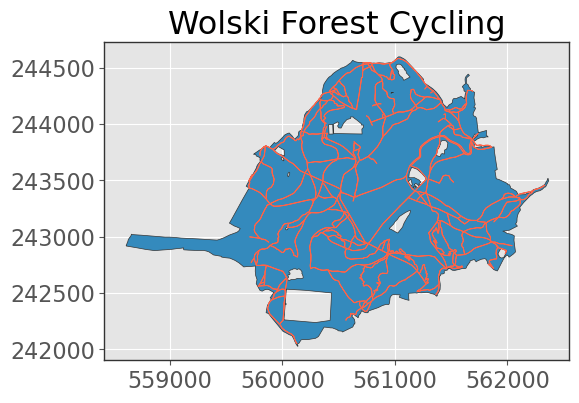

In [28]:
ax = wolski_forest.plot(edgecolor="0.2")
bike_network.plot(ax=ax, edgecolor="tomato")
plt.title("Wolski Forest Cycling");

Now we can calculate the area using the `.area` attribute. Note that `geopandas` is smart enough to know that you probably want to calculate these spatial attributes on the `geometry` column, so you don't actually have to index that particular column (if you have multiple geometry columns, then you can choose which one is "active" and acted on by default using the `.set_geometry()` method):

In [29]:
bike_network_area = bike_network.area.sum()
print(f"Bike path area: {bike_network_area:.0f} m2")

Bike path area: 283682 m2


If you think about it, that should be roughly similar to if we just multiplied our `total_length` from "Question 1" by 3 (the width of the bike paths):

In [30]:
total_length * 3

278159.6603443654

Well that's a nice sanity check! Now we just need the area of Wolski Forest and we can calculate our ratio:

In [31]:
wolski_forest_area = wolski_forest.area
print(f"{bike_network_area / wolski_forest_area[0] * 100:.2f}% of Wolski Forest is bike paths.")

6.97% of Wolski Forest is bike paths.


#### Question 3: Which part of Lesser Poland has the most bike lanes (by length)?

So to answer this question, we need two things:
1. Admin district polygons (already downloaded)

In [32]:
poland_admin_divisions_2 = gpd.read_file("data-spatial/postal-codes")  # note that I point to the shapefile "directory" containg all the individual files
# poland_admin_divisions = poland_admin_divisions.to_crs("EPSG:2180")    # I'll explain this later, I'm converting to a different coordinate reference system
poland_admin_divisions_2

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,181,POL,Poland,1,ÅÃ³dÅº,1,ÅÃ³dÅº East,None,0,None,Powiat,County,None,Powiat LÃ³dzki Wschodni,"POLYGON ((19.94863 51.69453, 19.95766 51.68640..."
1,181,POL,Poland,1,ÅÃ³dÅº,2,ÅÃ³dÅº,None,0,None,Powiat,City,None,None,"POLYGON ((19.43115 51.63008, 19.39816 51.64681..."
2,181,POL,Poland,1,ÅÃ³dÅº,3,Åask,None,0,None,Powiat,County,None,Powiat Laski,"POLYGON ((18.86274 51.29820, 18.86443 51.30588..."
3,181,POL,Poland,1,ÅÃ³dÅº,4,ÅÄczyca,None,0,None,Powiat,County,None,Powiat LÄczycki,"POLYGON ((19.55936 51.99213, 19.54240 51.98181..."
4,181,POL,Poland,1,ÅÃ³dÅº,5,Åowicz,None,0,None,Powiat,County,None,Powiat Lowicki,"POLYGON ((19.80733 51.91221, 19.81419 51.92760..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,181,POL,Poland,16,West Pomeranian,372,SÅawno,None,0,None,Powiat,County,None,Powiat SÅawieÅski,"POLYGON ((16.25050 54.34125, 16.25083 54.34125..."
372,181,POL,Poland,16,West Pomeranian,373,Stargard,None,0,None,Powiat,County,None,Powiat Stargardzki,"POLYGON ((14.84329 53.22477, 14.85434 53.23961..."
373,181,POL,Poland,16,West Pomeranian,374,Szczecinek,None,0,None,Powiat,County,None,Powiat Szczecinecki,"POLYGON ((17.05775 53.82642, 17.04921 53.82366..."
374,181,POL,Poland,16,West Pomeranian,375,Szczecin,None,0,None,Powiat,City,None,Stettin|SztetÃ«no|Stetinum,"POLYGON ((14.76996 53.40622, 14.77448 53.39664..."


In [33]:
admin_division_2 = "Lesser Poland"

In [34]:
lesser_poland = poland_admin_divisions_2.query("NAME_1 == @admin_division_2").copy()
lesser_poland

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
96,181,POL,Poland,5,Lesser Poland,97,Bochnia,None,0,None,Powiat,County,None,Powiat BocheÅski,"POLYGON ((20.61674 49.82731, 20.60448 49.83069..."
97,181,POL,Poland,5,Lesser Poland,98,Brzesko|Brzeg,None,0,None,Powiat,County,None,Powiat Brzeski,"POLYGON ((20.62342 49.80277, 20.62129 49.81656..."
98,181,POL,Poland,5,Lesser Poland,99,ChrzanÃ³w,None,0,None,Powiat,County,None,Powiat Chrzanowski,"POLYGON ((19.46360 49.97612, 19.45726 49.98189..."
99,181,POL,Poland,5,Lesser Poland,100,DÄ browa,None,0,None,Powiat,County,None,Powiat DÄ browski,"POLYGON ((21.22010 50.13378, 21.22013 50.12575..."
100,181,POL,Poland,5,Lesser Poland,101,Gorlice,None,0,None,Powiat,County,None,Powiat Gorlicki,"POLYGON ((20.94507 49.72034, 20.96120 49.72434..."
101,181,POL,Poland,5,Lesser Poland,102,KrakÃ³w City,None,0,None,Powiat,City,None,Krakau|Krakuf,"POLYGON ((20.23615 50.04545, 20.20577 50.03065..."
102,181,POL,Poland,5,Lesser Poland,103,KrakÃ³w,None,0,None,Powiat,County,None,Powiat Krakowski,"POLYGON ((20.23615 50.04545, 20.21876 50.05630..."
103,181,POL,Poland,5,Lesser Poland,104,Limanowa,None,0,None,Powiat,County,None,Powiat Limanowski,"POLYGON ((20.62342 49.80277, 20.61997 49.79781..."
104,181,POL,Poland,5,Lesser Poland,105,MiechÃ³w,None,0,None,Powiat,County,None,Powiat Miechowski,"POLYGON ((20.34905 50.29085, 20.33084 50.28761..."
105,181,POL,Poland,5,Lesser Poland,106,MyÅlenice,None,0,None,Powiat,County,None,Powiat MyÅlenicki,"POLYGON ((20.27811 49.79694, 20.26897 49.78952..."


2. The bike network for all of Lesser Poland

Now let's get the Poland bike network using `osmnx`:

In [36]:
lesser_poland_bike_network = ox.graph_from_place("Lesser Poland", network_type="bike")
lesser_poland_bike_network = (ox.graph_to_gdfs(lesser_poland_bike_network, nodes=False)
                      .reset_index(drop=True)
                      .loc[:, ["name", "length", "bridge", "geometry"]]
                   )

In [37]:
lesser_poland_bike_network

,name,length,bridge,geometry
0,Skibówki,77.710,NaN,"LINESTRING (19.92929 49.28664, 19.93000 49.28716)"
1,Skibówki,34.977,NaN,"LINESTRING (19.92929 49.28664, 19.92925 49.286..."
2,Skibówki,12.019,NaN,"LINESTRING (19.92929 49.28664, 19.92934 49.286..."
3,Skibówki Kącina,131.445,NaN,"LINESTRING (19.92505 49.28500, 19.92517 49.284..."
4,Skibówki,41.619,NaN,"LINESTRING (19.92505 49.28500, 19.92509 49.285..."
...,...,...,...,...
1102291,NaN,542.890,NaN,"LINESTRING (19.57024 50.39640, 19.57018 50.396..."
1102292,NaN,474.785,NaN,"LINESTRING (19.57024 50.39640, 19.57063 50.396..."
1102293,NaN,745.104,NaN,"LINESTRING (19.57212 50.40283, 19.57303 50.402..."
1102294,NaN,850.389,NaN,"LINESTRING (19.57212 50.40283, 19.57228 50.402..."


Let's take a look at our data so far:

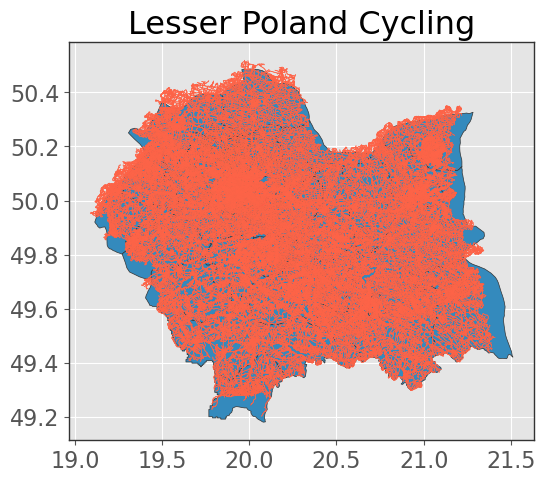

In [38]:
ax = lesser_poland.plot(edgecolor="0.2")
lesser_poland_bike_network.plot(ax=ax, edgecolor="tomato", linewidth=0.5)
plt.title("Lesser Poland Cycling");

Okay so how do we work out the total length of bike lanes in each admin district? We need to do a spatial join, which joins two geometries based on their locations. In the plot below, we'll join the column of the dark dot to the column(s) of the grey polygon because the dark dot is contained within the spatial region of the polygon.

![](img/spatial-join.png)

>Source: [GISGeography](https://gisgeography.com/spatial-join/).

We can do a spatial join with `gpd.sjoin()` (it's just like joining in base `pandas`). There are different options for the argument `op` which allow you how to control the join. Below I'll specify "contain", meaning I only want to join when a bike lane is fully contained within an FSA (you can read more about `op` in the [documentation](https://geopandas.org/docs/user_guide/mergingdata.html#sjoin-arguments));

In [39]:
joined_data = gpd.sjoin(lesser_poland, lesser_poland_bike_network, how="inner", op="contains")
joined_data

/home/stephen137/mambaforge/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,index_right,name,length,bridge
96,181,POL,Poland,5,Lesser Poland,97,Bochnia,None,0,None,Powiat,County,None,Powiat BocheÅski,"POLYGON ((20.61674 49.82731, 20.60448 49.83069...",665090,NaN,485.542,NaN
96,181,POL,Poland,5,Lesser Poland,97,Bochnia,None,0,None,Powiat,County,None,Powiat BocheÅski,"POLYGON ((20.61674 49.82731, 20.60448 49.83069...",650910,NaN,485.542,NaN
96,181,POL,Poland,5,Lesser Poland,97,Bochnia,None,0,None,Powiat,County,None,Powiat BocheÅski,"POLYGON ((20.61674 49.82731, 20.60448 49.83069...",650903,NaN,83.607,NaN
96,181,POL,Poland,5,Lesser Poland,97,Bochnia,None,0,None,Powiat,County,None,Powiat BocheÅski,"POLYGON ((20.61674 49.82731, 20.60448 49.83069...",650899,NaN,83.607,NaN
96,181,POL,Poland,5,Lesser Poland,97,Bochnia,None,0,None,Powiat,County,None,Powiat BocheÅski,"POLYGON ((20.61674 49.82731, 20.60448 49.83069...",650901,NaN,8.727,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,181,POL,Poland,5,Lesser Poland,118,Wieliczka,None,0,None,Powiat,County,None,Powiat Wielicki,"POLYGON ((20.25914 49.84419, 20.24190 49.85167...",254596,Zastawiec,48.148,NaN
117,181,POL,Poland,5,Lesser Poland,118,Wieliczka,None,0,None,Powiat,County,None,Powiat Wielicki,"POLYGON ((20.25914 49.84419, 20.24190 49.85167...",254600,NaN,67.055,NaN
117,181,POL,Poland,5,Lesser Poland,118,Wieliczka,None,0,None,Powiat,County,None,Powiat Wielicki,"POLYGON ((20.25914 49.84419, 20.24190 49.85167...",254590,NaN,67.055,NaN
117,181,POL,Poland,5,Lesser Poland,118,Wieliczka,None,0,None,Powiat,County,None,Powiat Wielicki,"POLYGON ((20.25914 49.84419, 20.24190 49.85167...",254591,Zastawiec,189.900,NaN


Now we just need to `.groupby()`:

In [40]:
(joined_data[["NAME_2", "length"]].groupby(by="NAME_2")
                                   .sum()
                                   .sort_values("length", ascending=False)
                                   .head()
)

,length
NAME_2,
KrakÃ³w,1.783764e+07
Nowy SÄ cz,1.431092e+07
TarnÃ³w,1.105079e+07
Nowy Targ,1.020834e+07
Limanowa,9.988521e+06


We see that "KrakÃ³w" or `Kraków` has the largest length of bike lanes.

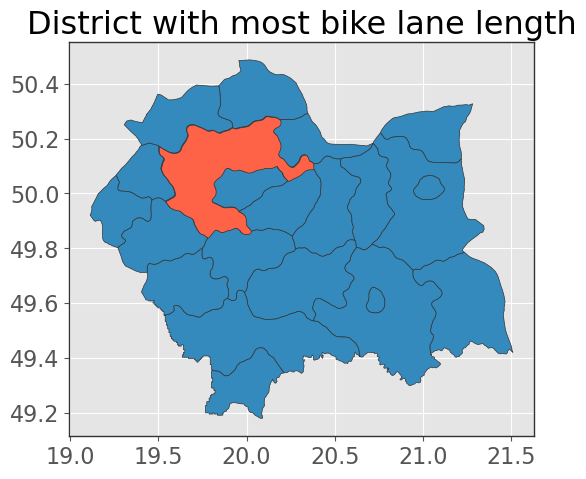

In [41]:
ax = lesser_poland.plot(edgecolor="0.2")
lesser_poland.query("NAME_2 == 'KrakÃ³w'").plot(ax=ax, edgecolor="0.2", color="tomato")
plt.title("District with most bike lane length");

Looks good to me!

## 3. Working with raster data

Unlike vector data (geometric objects: like points, lines, polygons), raster data is a matrix of values of "pixels" (also called "cells"). Each cell represents a small area and contains a value representing some information:

![](img/raster.png)

>Source: [National Ecological Observatory Network](https://github.com/NEONScience/NEON-Data-Skills).

Raster data is like digital image data you look at on your computer, except that now, each pixel represents a spatial region. The "resolution" of a raster is the area that each pixel represents. A 1 meter resolution raster means that each pixel represents a 1 m x 1 m area on the ground. However, when we say "high resolution" we often mean, a low value of resolution for each pixel, i.e., 1 meter resolution is higher than 8 meter resolution as exmplified by the image below:

![](img/raster-resolution.png)

>Source: [National Ecological Observatory Network](https://github.com/NEONScience/NEON-Data-Skills).

Like vector data, there are different file formats for storing raster data. The most common is GeoTIFF (`.tif`), which is essentially an image file with georeferencing information embedded within it. Raster data is used for a variety of problems, common examples include satellite imagery and digital elevation models. Those things are gettings a bit outside the scope of this course but let's briefly look at some raster data below. The core packge for working with raster data in Python is [rasterio](https://rasterio.readthedocs.io/en/latest/index.html).

In [42]:
import rasterio

I have a satellite image raster file in my data folder which I downloaded as part of a QGIS tutotial. Let's load it in with `rasterio`:

In [45]:
dataset = rasterio.open("data-spatial/tif/infrared_mapcanvas.tif")

We can start to investigate things like the width and height (in pixels/cells) of the raster:

In [46]:
print(f"Width: {dataset.width} pixels")
print(f"Height: {dataset.height} pixels")

Width: 1070 pixels
Height: 852 pixels


Raster data often have "bands" representing different information (for example, a colour image usually has red, green, and blue bands). This particular satellite image has 4 bands (in order: red, blue, green, infrared):

In [47]:
dataset.count

4

We could import the first band as a numpy array using:

In [48]:
band1 = dataset.read(1)
band1

array([[ 16,  18,  18, ..., 187, 169, 157],
       [ 17,  17,  17, ..., 181, 162, 153],
       [ 19,  18,  18, ..., 176, 158, 152],
       ...,
       [112, 114, 114, ..., 159, 163, 161],
       [113, 114, 114, ..., 166, 163, 163],
       [113, 115, 115, ..., 170, 165, 169]], dtype=uint8)

But before importing anymore data, it's helpful to just see the image. First I'm going to "downsample" my raster (reduce the resolution by increasing the cell size) to reduce the size of the data and speed things up a bit:

In [49]:
rescale_factor = 0.5
scaled_data = dataset.read(out_shape=(dataset.count, int(dataset.height * rescale_factor),
                                      int(dataset.width * rescale_factor))
                          )
print(f"Scaled shape: {scaled_data.shape}")

Scaled shape: (4, 426, 535)


As our data is just numpy array(s), we can plot it with the `matplotlib` function `plt.imshow()`:

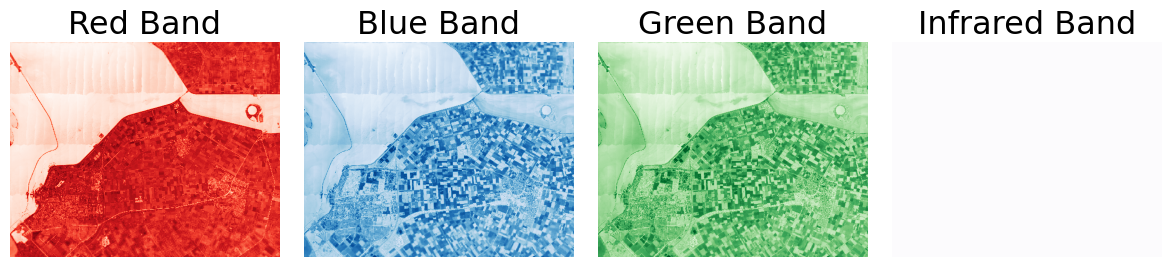

In [50]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
cmaps = ["Reds", "Blues", "Greens", "Purples"]
bands = ["Red Band", "Blue Band", "Green Band", "Infrared Band"]
for band in [0, 1, 2, 3]:
    ax[band].imshow(scaled_data[band, :, :], cmap=cmaps[band])
    ax[band].set_title(bands[band])
    ax[band].axis("off")
plt.tight_layout();

Of course, it looks more realistic using all channels:

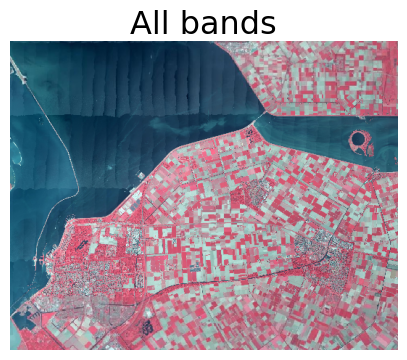

In [51]:
plt.figure(figsize=(5, 5))
plt.imshow(np.moveaxis(scaled_data, 0, -1)[:, :, :3])
plt.axis("off")
plt.title("All bands");

`rasterio` has lots of advanced fucntionality for manipulating and plotting raster data if you find the need to. [Check out the documentation](https://rasterio.readthedocs.io/en/latest/index.html).

## 4. Coordinate reference systems
<hr>

Generally speaking a coordinate reference system is how we project the 3D surface of the Earth onto a 2D shape for easy viewing

![](img/projection.gif)

There are [many different projections](https://en.wikipedia.org/wiki/List_of_map_projections) and they are typically identified by an [EPSG code](https://epsg.io/). No projection is perfect (it's impossible to perfectly flatten a 3d sphere) and each comprises on minimzing the distortion of shapes, distances, and areas of the Earth. At a basic level, all you need to know is that some projections are:
- in angular units (degrees of latitude and longitude) and are good for locating places on Earth, for making global maps, and minimizing shape distortion. The most common is WGS 84 ("[EPSG:4326](https://epsg.io/4326)")
- in linear units (e.g., meters) and are good for measuring distances. Most common is UTM which splits the Earth into different linear regions, the code for the region encompassing British Columbia is "[EPSG:32610](https://epsg.io/32610)"

But many countries/regions use other specific projections which minimize distortion of that specific area. For example Statistics Canada uses the Lambert projection for Canada ("[EPSG:3347](https://epsg.io/3347)"). Much of the time, you will know or be told which projection to use based on your specific data/project.

Let's take a quick look at some different projections for Canada now:

/tmp/ipykernel_219/550249266.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  canada = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).query("name == 'Poland'")


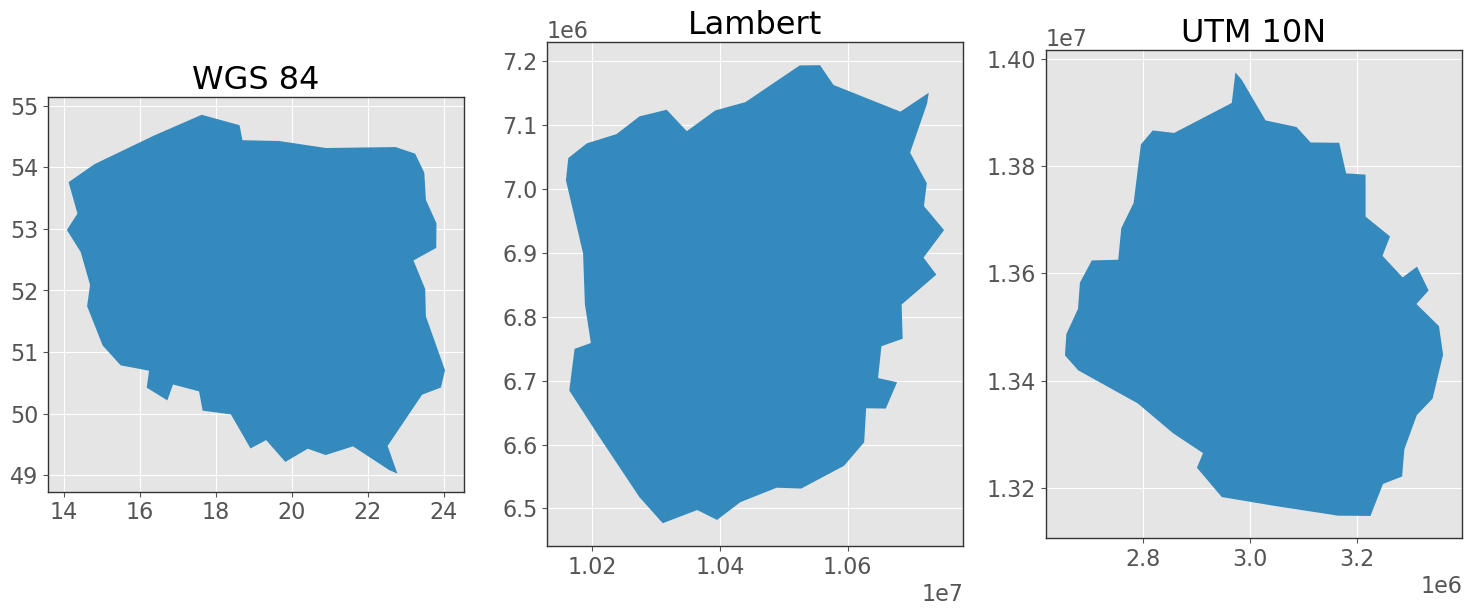

In [53]:
# Load data from geopandas
canada = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).query("name == 'Poland'")

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 12))
crs_list = [("WGS 84", "EPSG:4326"), ("Lambert", "EPSG:3347"), ("UTM 10N", "EPSG:32610")]
for n, (name, epsg) in enumerate(crs_list):
    canada.to_crs(epsg).plot(ax=axs[n])
    axs[n].set_title(name)
plt.tight_layout();

![](img/bye.png)